## Homework 10, part 2

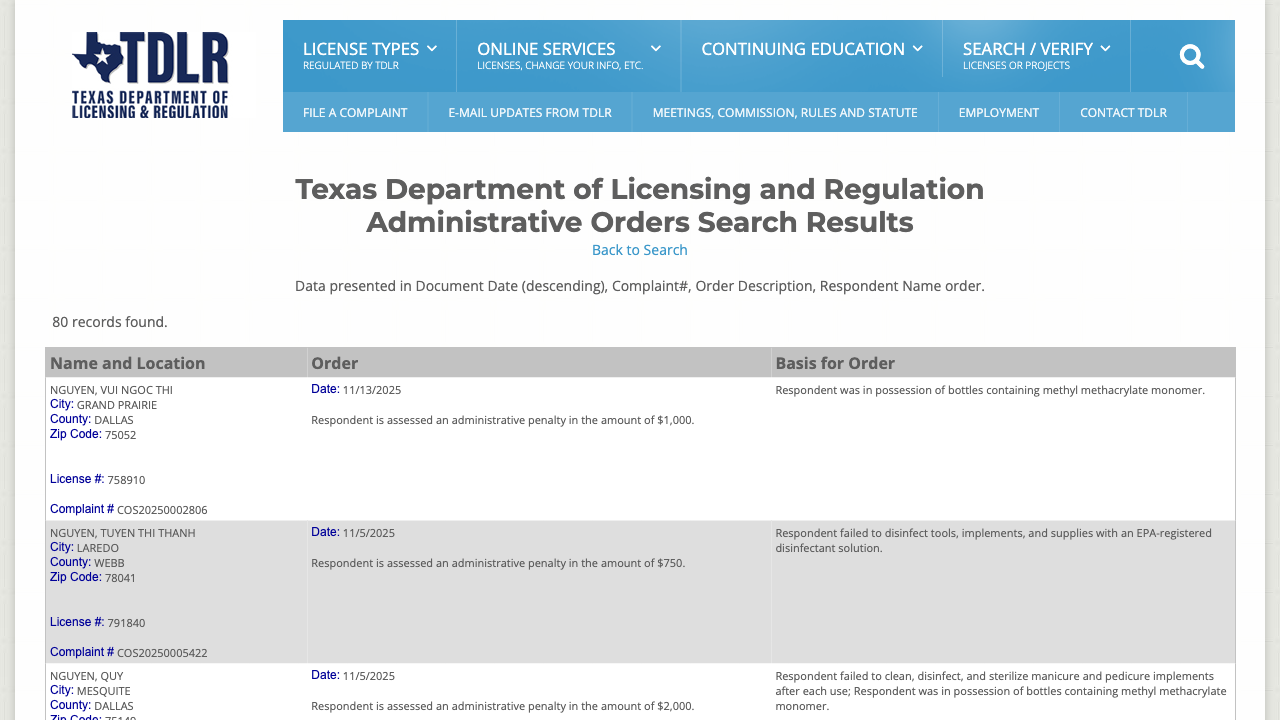

Scraped 40 total rows for NGUYEN.


,Name,Company,City,County,Zip,License,Complaint,Date,Penalty,Violation
0,"NGUYEN, TUYEN THI THANH City: LAREDO County: W...",None,LAREDO,WEBB,78041,791840,COS20250005422,11/5/2025 Respondent is assessed an administra...,,"Respondent failed to disinfect tools, implemen..."
1,"NGUYEN, NAM QUANG City: HARKER HEIGHTS County:...",None,HARKER HEIGHTS,BELL,76548,745552,COS20220017482,10/30/2025 Respondent is assessed an administr...,,"Respondent failed to clean, disinfect, and ste..."
2,"NGUYEN, PHUONG T City: MCALLEN County: HIDALGO...",None,MCALLEN,HIDALGO,78504,827019,COS20240017888,9/25/2025 Respondents Phuong Thi Thanh Nguyen ...,,Respondents employed an individual as an opera...
3,"NGUYEN, PHI THO City: BRADY County: MCCULLOCH ...",None,BRADY,MCCULLOCH,76825,867205,COS20250011948,9/4/2025 Respondent is assessed an administrat...,,"Respondent failed to clean, disinfect, and ste..."
4,"NGUYEN, QUY City: MESQUITE County: DALLAS Zip ...",None,MESQUITE,DALLAS,75149,722334,COS20230012801,8/11/2025 Respondent is assessed an administra...,,Respondent failed to utilize clean and disinfe...


In [69]:
# Cell: Scrape NGUYEN violations (leave License blank) and parse results
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display, Image
import asyncio

async def scrape_nguyen_all():
    async with async_playwright() as p:
        # Launch Chromium headful
        browser = await p.chromium.launch(headless=False)
        context = await browser.new_context()
        page = await context.new_page()
        
        # Go to the search form page
        await page.goto("https://www.tdlr.texas.gov/cimsfo/fosearch.asp")
        
        # Wait for the Last Name input
        await page.wait_for_selector("#pht_lnm", timeout=30000)
        
        # Fill Last Name only, leave License blank
        await page.fill("#pht_lnm", "NGUYEN")
        
        # Click Search
        await page.click("input[name='B1']")
        
        # Wait for the results table to appear
        await page.wait_for_selector("tr[style*='background']", timeout=30000)
        
        # Take a screenshot for confirmation
        screenshot_bytes = await page.screenshot()
        display(Image(screenshot_bytes))
        
        # Grab page HTML
        html = await page.content()
        
        # Parse HTML with BeautifulSoup
        soup = BeautifulSoup(html, "html.parser")
        rows = soup.find_all("tr", style=lambda x: x and ('white' in x or 'dedede' in x))
        
        records = []
        for row in rows:
            tds = row.find_all("td")
            if len(tds) != 3:
                continue
            
            left = tds[0].get_text(" ", strip=True)
            def extract_between(text, label):
                if label not in text:
                    return None
                part = text.split(label, 1)[1].strip()
                for lbl in ["Company:", "City:", "County:", "Zip Code:", "License #:", "Complaint #"]:
                    if lbl != label and lbl in part:
                        part = part.split(lbl, 1)[0].strip()
                return part

            name = left.split(" Company:")[0].strip()
            company = extract_between(left, "Company:")
            city = extract_between(left, "City:")
            county = extract_between(left, "County:")
            zipcode = extract_between(left, "Zip Code:")
            license_no = extract_between(left, "License #:")
            complaint_no = extract_between(left, "Complaint #")

            middle = tds[1].get_text(" ", strip=True)
            date = extract_between(middle, "Date:")
            penalty_text = middle.split(date,1)[1].strip() if date else None

            violation_text = tds[2].get_text(" ", strip=True)

            records.append({
                "Name": name,
                "Company": company,
                "City": city,
                "County": county,
                "Zip": zipcode,
                "License": license_no,
                "Complaint": complaint_no,
                "Date": date,
                "Penalty": penalty_text,
                "Violation": violation_text
            })
        
        df = pd.DataFrame(records)
        print(f"Scraped {len(df)} total rows for NGUYEN.")
        display(df.head())
        
        return df, browser  # Keep browser open

# Run the scraper
df, browser = await scrape_nguyen_all()


In [72]:
# Save all NGUYEN violations (no filtering)
csv_filename = "nguyen_all_violations.csv"
df.to_csv(csv_filename, index=False)
print(f"Saved {len(df)} total NGUYEN violation rows to {csv_filename}.")
df.head()


Saved 40 total NGUYEN violation rows to nguyen_all_violations.csv.


,Name,Company,City,County,Zip,License,Complaint,Date,Penalty,Violation
0,"NGUYEN, TUYEN THI THANH City: LAREDO County: W...",None,LAREDO,WEBB,78041,791840,COS20250005422,11/5/2025 Respondent is assessed an administra...,,"Respondent failed to disinfect tools, implemen..."
1,"NGUYEN, NAM QUANG City: HARKER HEIGHTS County:...",None,HARKER HEIGHTS,BELL,76548,745552,COS20220017482,10/30/2025 Respondent is assessed an administr...,,"Respondent failed to clean, disinfect, and ste..."
2,"NGUYEN, PHUONG T City: MCALLEN County: HIDALGO...",None,MCALLEN,HIDALGO,78504,827019,COS20240017888,9/25/2025 Respondents Phuong Thi Thanh Nguyen ...,,Respondents employed an individual as an opera...
3,"NGUYEN, PHI THO City: BRADY County: MCCULLOCH ...",None,BRADY,MCCULLOCH,76825,867205,COS20250011948,9/4/2025 Respondent is assessed an administrat...,,"Respondent failed to clean, disinfect, and ste..."
4,"NGUYEN, QUY City: MESQUITE County: DALLAS Zip ...",None,MESQUITE,DALLAS,75149,722334,COS20230012801,8/11/2025 Respondent is assessed an administra...,,Respondent failed to utilize clean and disinfe...
